In [1]:
from datasets import ExploratoryDataset
from utils import *
from models import DescriptionNet,TitleNet,get_pretrained_resnet
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms

In [2]:
ds = ExploratoryDataset(transform=get_augmentation_dict())

In [3]:
classes = ds.y_len
desc_size = ds.desc_len
title_size = ds.title_len

In [4]:
image_net = get_pretrained_resnet(classes) 
desc_net = DescriptionNet(input_size=desc_size, num_classes=classes)
title_net = TitleNet(input_size=title_size,num_classes=classes)

image_net.load_state_dict(torch.load('../models/image_resnet_50_002.pth'))
image_net.eval()
desc_net.load_state_dict(torch.load('../models/desc_100_015.pth'))
desc_net.eval()
title_net.load_state_dict(torch.load('../models/title_100_015.pth'))
title_net.eval()

TitleNet(
  (fcm1): Sequential(
    (0): Dropout(p=0.6)
    (1): Linear(in_features=5871, out_features=400, bias=True)
    (2): ReLU(inplace)
  )
  (fcm2): Sequential(
    (0): Dropout(p=0.6)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): ReLU(inplace)
  )
  (fcm3): Sequential(
    (0): Dropout(p=0.6)
    (1): Linear(in_features=120, out_features=60, bias=True)
    (2): ReLU(inplace)
  )
  (fcm4): Linear(in_features=60, out_features=15, bias=True)
)

In [30]:
dl = torch.utils.data.DataLoader(ds, batch_size=1,shuffle=False, num_workers=0)

In [45]:
niter = iter(dl)
image, desc, title, gt =next(niter)
image, desc, title, gt =next(niter)
image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)
# image, desc, title, gt =next(niter)


In [46]:
image

tensor([[[[-0.1143, -0.2171, -0.1486,  ..., -0.2342, -0.3198,  0.0569],
          [-0.1314, -0.1143, -0.6281,  ..., -0.2342, -0.3198,  0.1083],
          [-0.2171, -0.5253, -0.7137,  ..., -0.2342, -0.3198,  0.1254],
          ...,
          [ 1.4954,  1.4954,  1.4954,  ...,  0.7762,  0.7591,  0.7762],
          [ 1.5125,  1.5125,  1.4783,  ...,  0.7762,  0.7591,  0.7762],
          [ 1.4783,  1.4783,  1.4098,  ...,  0.8104,  0.8276,  0.8276]],

         [[-0.4076, -0.5126, -0.4426,  ..., -0.6877, -0.7752, -0.3901],
          [-0.4251, -0.4076, -0.9328,  ..., -0.6877, -0.7752, -0.3375],
          [-0.5126, -0.8277, -1.0203,  ..., -0.6877, -0.7752, -0.3200],
          ...,
          [ 1.1331,  1.1331,  1.1331,  ...,  0.2227,  0.2052,  0.2227],
          [ 1.1506,  1.1506,  1.1155,  ...,  0.2227,  0.2052,  0.2227],
          [ 1.1155,  1.1155,  1.0455,  ...,  0.2577,  0.2752,  0.2752]],

         [[-0.6367, -0.7413, -0.6715,  ..., -1.0201, -1.1421, -0.7761],
          [-0.6541, -0.6367, -

In [47]:
image_out = image_net(image)
desc_out = desc_net(desc)
title_out = title_net(title)

In [48]:
print(F.softmax(image_out,dim=1))
print(F.softmax(desc_out,dim=1))
print(F.softmax(title_out,dim=1))

tensor([[0.6635, 0.0009, 0.0016, 0.0015, 0.0777, 0.0101, 0.0239, 0.0795, 0.0200,
         0.0028, 0.0200, 0.0113, 0.0005, 0.0844, 0.0021]],
       grad_fn=<SoftmaxBackward>)
tensor([[3.5620e-02, 4.8565e-05, 4.0077e-04, 5.1514e-06, 3.7644e-01, 2.9056e-03,
         2.9629e-03, 3.5141e-02, 5.5897e-02, 7.2838e-03, 6.5697e-02, 8.0377e-03,
         2.5716e-05, 4.0950e-01, 3.6874e-05]], grad_fn=<SoftmaxBackward>)
tensor([[1.8043e-01, 1.9850e-03, 4.4939e-03, 5.0106e-04, 1.2945e-01, 6.2730e-06,
         9.0074e-03, 5.4693e-03, 5.2648e-05, 2.3791e-03, 1.4365e-01, 8.5673e-03,
         7.1397e-07, 5.0797e-01, 6.0361e-03]], grad_fn=<SoftmaxBackward>)


In [53]:
print(torch.max(F.softmax(image_out,dim=1),1))
print(torch.max(F.softmax(desc_out,dim=1),1))
print(torch.max(F.softmax(title_out,dim=1),1))
print(gt)

(tensor([0.6635], grad_fn=<MaxBackward0>), tensor([0]))
(tensor([0.4095], grad_fn=<MaxBackward0>), tensor([13]))
(tensor([0.5080], grad_fn=<MaxBackward0>), tensor([13]))
tensor([13])


In [50]:
invTrans = get_inverse_transform()
image = invTrans(image.squeeze(0))
img = torchvision.transforms.functional.to_pil_image(image)

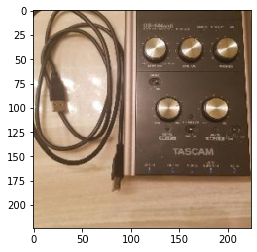

In [51]:
plt.imshow(img)

In [28]:
#labels = ds.y_codec.classes_

In [29]:
labels

array(['Amplifiers & Effects', 'Band & Orchestra', 'Bass Guitars',
       'Brass Instruments', 'DJ, Electronic Music & Karaoke',
       'Drums & Percussion', 'Guitars', 'Instrument Accessories',
       'Keyboards', 'Live Sound & Stage', 'Microphones & Accessories',
       'Other', 'Stringed Instruments', 'Studio Recording Equipment',
       'Wind & Woodwind Instruments'], dtype=object)